![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import matplotlib.pyplot as plt

In [3]:
# Configuración de estilo de Matplotlib
plt.rcParams.update({

    # FUENTE
    'font.family': 'Arial',
    'text.color': '#353535',

    # TITULOS
    'figure.titlesize': 16,  # Tamaño de fuente del suptítulo de la figura
    'figure.titleweight': 'bold',  # Peso de la fuente del suptítulo de la figura

    # SUBTITULOS
    'axes.titlesize': 12,
    'axes.titleweight': 'regular',

    # ETIQUETAS DE EJES
    'axes.labelsize': 10,  # Tamaño de las etiquetas de los ejes
    'axes.labelweight': 'regular',  # Peso de la fuente de las etiquetas de los ejes
    'axes.labelcolor': '#353535',  # Color de las etiquetas de los ejes

    # SPINES
    'axes.spines.left':   False,  # display axis spines
    'axes.spines.bottom': True,
    'axes.spines.top':    False,
    'axes.spines.right':  False,

    # TICKS
    'xtick.bottom':        True   , # draw ticks on the bottom side
    'xtick.labelbottom':   True   , # draw label on the bottom
    'xtick.color':         '#353535'  , # color of the ticks
    'xtick.labelcolor':    'inherit', # color of the tick labels or inherit from xtick.color
    'xtick.labelsize':     10 , # font size of the tick labels
    'xtick.direction':     'out'    , # direction: {in, out, inout}

    'ytick.color': '#353535',
    'ytick.left': False, # Oculta los ticks de y en el lado izquierdo

    # GRIDS
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'grid.alpha': 0.5,
    'grid.color': '#DEDDDD',
    'grid.linestyle': '-.',

})

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
season_stats = bikes.groupby('season')['total'].describe(percentiles=[.25, .50, .75])
print("Estadísticas descriptivas por temporada:")
display(season_stats)

Estadísticas descriptivas por temporada:


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


 - Podemos concluir que el alquiler de bicicletas es más popular en verano y primavera, siendo el verano un poco más popular que la primavera.
 - La actividad es alta en otoño, pero menor que en verano.
 - La cantidad de actividad es menor en invierno, ya que hace más frío y las condiciones climáticas pueden ser menos favorables para el ciclismo.
 - En todas las temporadas se muestran alquileres  de al menos 1, indicando épocas en las que la demanda es muy baja.
 - Los picos más altos ocurren en verano y otoño, lo que sugiere días de alta demanda durante estas estaciones.
 - El invierno es la  más variable de  las estaciones.

In [6]:
# Celda 1.2
hour_stats = bikes.groupby('hour')['total'].describe(percentiles=[.25, .50, .75])
print("\nEstadísticas descriptivas por hora del día:")
print(hour_stats)


Estadísticas descriptivas por hora del día:
      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.67

 - Las horas de madrugada (de 0 a 4) tienen los menores promedios de alquiler, siendo mínimos alrededor de las 3 y 4 de la mañana, lo cual sugiere muy poca actividad en estas horas.
 - A partir de las 5 de la mañana, el número empieza a aumentar significativamente, alcanzando un primer pico en la hora 8 (362.77). Esto puede deberse a el traslado al trabajo, colegio o universidad.
 - Después de una disminución en las horas posteriores a la mañana y una estabilización de los viajes hacia medio día y las 15 hotasd, hay un segundo pico aún mayor en las horas de la tarde, particularmente de 17 a 18 (468.77 y 430.86 respectivamente), lo cual probablemente refleja el uso de bicicletas para el viaje de regreso a casa.
 - Después de las 18, los números comienzan a disminuir nuevamente, pero se permanecen relativamente altos hasta alrededor de las 20 horas, disminuyendo significativamente después de eso.
 - Todos los percentiles del período coinciden con el promedio de alquiler de cada período.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

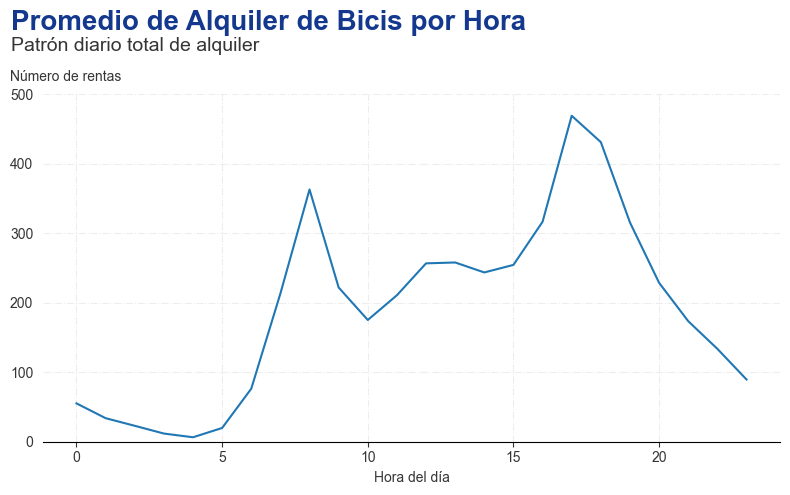

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"

# DANDOLE CARIÑO A LA GRÁFICA
fig, ax = plt.subplots(figsize=(8,5))
bikes.groupby('hour').total.mean().plot(ax=ax)

ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de rentas', ha='left', y=1.03, rotation=0, labelpad=0)
ax.set_ylim([0, 500])

fig.text(0.02, 0.94, 'Promedio de Alquiler de Bicis por Hora', fontsize=20, weight='bold', ha='left', color='#13388E')
fig.text(0.02, 0.89, f'Patrón diario total de alquiler', fontsize=14, ha='left', va='bottom', color='#353535')

plt.tight_layout(rect=[0, 0, 1, 0.88])

 - Las horas punta para el alquiler de bicicletas se corresponden claramente con las horas punta normales de viaje, con un pico de  demanda al inicio y al final de la jornada laboral.
 - Desde las horas de la madrugada 0 horas y hasta las 5 horas se presenta la reducción de las rentas llegando a su minimo en el día durante la hora 4. 
 - El uso de la bicicleta se mantiene en un nivel moderado durante el día y la noche, probablemente para ocio y actividades  personales.
 - Estos resultados convellan que se tengan suficientes bicicletas disponibles durante las horas pico. 

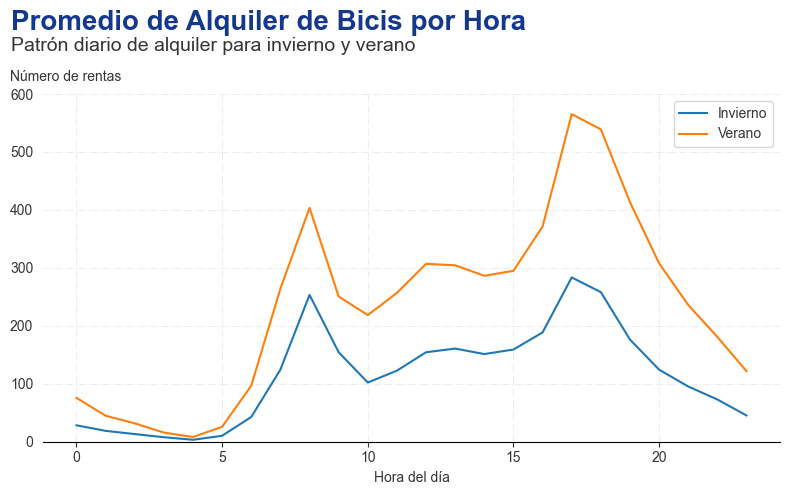

In [8]:
season_1 = bikes[bikes['season'] == 1].groupby('hour').total.mean()
season_3 = bikes[bikes['season'] == 3].groupby('hour').total.mean()

# Ahora generamos la gráfica con los promedios calculados
fig, ax = plt.subplots(figsize=(8,5))

# Gráfico para la temporada 1
season_1.plot(ax=ax, label='Invierno')

# Gráfico para la temporada 3
season_3.plot(ax=ax, label='Verano')

# Configuraciones adicionales del gráfico
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de rentas', ha='left', y=1.03, rotation=0, labelpad=0)
ax.set_ylim([0, 600])
ax.legend()

# Título y subtítulo
fig.text(0.02, 0.94, 'Promedio de Alquiler de Bicis por Hora', fontsize=20, weight='bold', ha='left', color='#13388E')
fig.text(0.02, 0.89, f'Patrón diario de alquiler para invierno y verano', fontsize=14, ha='left', va='bottom', color='#353535')

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()

 - Picos de demanda: Se distinguen dos picos de demanda en el alquiler de bicicletas, tanto en invierno como en verano. Estos picos ocurren alrededor de las 8 horas. y entre las 17 y las 18 horas, lo que sugiere patrones de desplazamiento asociados con el inicio y el final del día laboral o escolar. Siendo claramente mayor en verano que invierno.
 - Diferencias estacionales: Las bicicletas se utilizan con mucha más frecuencia en verano que en  invierno, y esto se refleja en los precios medios de alquiler más elevados en casi todas las horas del día. Esto puede deberse a las condiciones climáticas  favorables para el ciclismo.
 - Alquiler en madrugadas y noche: Aunque hay menos actividad en las horas de la noche y de la madrugada, es interesante observar que incluso durante estas horas los alquileres de verano son más altos que los de invierno.
 - Actividades diarias: Durante los meses de verano,  hay un aumento significativo de alquileres desde media mañana hasta media tarde, además de las horas pico de la mañana y la tarde. Puede indicar que  las bicicletas se utilizan no sólo como medio de transporte en verano, sino también para el esparcimiento durante el día.
 - Disminución por la tarde: Después del pico de la tarde, el número de alquileres disminuye gradualmente a lo largo de la noche, lo que se vuelve más pronunciado en invierno, probablemente por temas de condiciones climáticas.
 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [28]:
# Celda 3
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = bikes[['season', 'hour']]
y = bikes['total']

# Convertir la variable "season" a variables dummy
encoder = OneHotEncoder(drop='first', sparse=False)
dummies = encoder.fit_transform(X['season'].to_numpy().reshape(-1, 1))
dummies_df = pd.DataFrame(dummies, columns=[f"season_{i}" for i in range(1, len(encoder.categories_[0]))], index=X.index)

# Concatenar las variables dummy con la variable 'hour'
X = pd.concat([X[['hour']], dummies_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes de la regresión
coefs = model.coef_
intercept = model.intercept_
print('Coeficientes e intercepto: ',coefs, intercept)

# Predicciones
y_pred = model.predict(X_test)

# Cálculos de MSE y R2
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print('\nLinear Regressión:')
print(f'MSE: {lr_mse:.2f}', f'R2: {lr_r2:.2f}')

Coeficientes e intercepto:  [ 10.56961908  99.10667072 116.04634     84.944802  ] -5.9195473419623

Linear Regressión:
MSE: 25409.92 R2: 0.23


Interpretación Coefs.

- El coeficiente de 10.57 es de 'hour', lo que significa que por cada hora adicional del día, se espera, en promedio, un aumento de 10.5452 alquileres, asumiendo que todo lo demás se mantiene constante.
- Temporada 2 (Primavera): Aumenta en 99.11 alquileres en promedio en comparación con la Temporada 1 (Invierno).
- Temporada 3 (Verano): Aumenta en 116.05 alquileres en promedio en comparación con la Temporada 1.
- Temporada 4 (Otoño): Aumenta en 84.94 alquileres en promedio en comparación con la Temporada 1.

¿Cuáles son las limitaciones de la regresión lineal en este caso? 

- El intercepto del modelo es -5.92, que teóricamente representa el número de alquileres cuando la hora es 0 y es la temporada de referencia (invierno). Sin embargo, este valor no tiene mucho sentido práctico en este contexto, ya que no podemos tener una cantidad negativa de alquileres.
 - La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. En la vida real, el número de alquileres de bicicletas puede no seguir una relación lineal estricta con la hora del día o la temporada.
 - La varianza de los errores residuales debe ser constante para todas las predicciones. Esto puede no ser cierto para datos de alquiler de bicicletas, donde podríamos ver más variabilidad en ciertas horas del día o temporadas del año.
 - Al convertir "season" en variables dummy, estamos imponiendo una estructura que no considera el orden natural de las temporadas, y esto podría no capturar completamente la naturaleza cíclica de los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [30]:
# Celda 4

# Definición de la función que calcula el mse
def mse(y):
    if y.shape[0] > 0:
        mean_y = np.mean(y)
        mse = np.mean((y - mean_y) ** 2)
        return mse
    else:
        return 0
    
# Def que encuentra el mejor corte
def best_split(X, y, num_pct=10):

    # Variables de seguimiento
    best_mse = np.inf

    for j in range(X.shape[1]):
        splits = np.percentile(X.iloc[:, j], np.linspace(0, 100, num_pct+1)[1:-1])
        for split in splits:
            left_mask = X.iloc[:, j] < split
            mse_left = mse(y[left_mask])
            mse_right = mse(y[~left_mask])
            mse_total = mse_left + mse_right

            if mse_total < best_mse:
                best_mse = mse_total
                best_var = j
                best_value = split

    return best_var, best_value, best_mse

def tree_grow(X, y, depth=0, max_depth=None, min_samples_leaf=1, num_pct=10):

    if depth == max_depth or len(y) <= min_samples_leaf:
        return {'prediction': np.mean(y)}

    j, split, mse_ = best_split(X, y, num_pct)

    if j is None:  # Asegúrate de que siempre haya un nodo con 'prediction' si no hay división
        return {'prediction': np.mean(y)}

    left_mask = X.iloc[:, j] < split
    right_mask = ~left_mask
    left = tree_grow(X[left_mask], y[left_mask], depth+1, max_depth, min_samples_leaf, num_pct)
    right = tree_grow(X[right_mask], y[right_mask], depth+1, max_depth, min_samples_leaf, num_pct)

    return {
        'variable': X.columns[j],
        'split': split,
        'mse': mse_,
        'left': left,
        'right': right
    }

def predict_tree(node, X):
    if 'variable' not in node:
        return node['prediction']
    if X[node['variable']] < node['split']:
        return predict_tree(node['left'], X)
    else:
        return predict_tree(node['right'], X)

def predict_tree_df(node, X_df):
    return X_df.apply(lambda row: predict_tree(node, row), axis=1)

tree = tree_grow(X_train, y_train, max_depth=6, min_samples_leaf=10, num_pct=10)

y_pred = predict_tree_df(tree, X_test)

manual_tree_mse = mean_squared_error(y_test, y_pred)
manual_tree_r2 = r2_score(y_test, y_pred)

print('Manual Tree:')
print(f'MSE: {manual_tree_mse:.2f}', f'R2: {manual_tree_r2:.2f}')

Manual Tree:
MSE: 22826.30 R2: 0.31


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [31]:
# Celda 5
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': range(3, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

grid = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R²
sk_tree_mse = mean_squared_error(y_test, y_pred)
sk_tree_r2 = r2_score(y_test, y_pred)

print('Sklearn Tree:')
print(f'MSE: {sk_tree_mse:.2f}', f'R2: {sk_tree_r2:.2f}')

Mejores parámetros: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Sklearn Tree:
MSE: 13455.27 R2: 0.59


La regresión lineal, siendo el modelo más simple de los tres, presenta el peor desempeño tanto en MSE como en R². Esto puede indicar que la relación entre las variables predictoras (`season` y `hour`) y la variable objetivo (`total`) no es estrictamente lineal, o que el modelo no captura suficientemente la complejidad de los datos. Un bajo R² de 0.23 significa que solo el 23% de la variabilidad en los datos de alquiler de bicicletas se explica por el modelo, lo que es bastante bajo.

El árbol de decisión manual mejora ligeramente sobre la regresión lineal en términos de MSE y R², lo que sugiere que este enfoque puede capturar mejor las no linealidades y las interacciones entre las variables. Un R² de 0.31 implica que el modelo manual puede explicar aproximadamente el 31% de la variabilidad en los datos, lo cual sigue siendo modesto, pero es una mejora respecto a la regresión lineal.

El árbol de decisión implementado con scikit-learn supera claramente a los otros dos modelos, tanto en términos de MSE como de R². Este modelo ha reducido el MSE considerablemente a 13455.27 y ha aumentado el R² a 0.59, indicando que ahora puede explicar el 59% de la variabilidad en los datos. 

Estos resultados subrayan la importancia de elegir el modelo adecuado y de ajustar cuidadosamente los parámetros del modelo, especialmente cuando se trabaja con datos complejos o relaciones no lineales.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [32]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [33]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [34]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [36]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [37]:
# Modelo de Árbol
dt = DecisionTreeClassifier(random_state=1)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluación del Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [40]:
# Modelo de Regresión Logística
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Evaluación de la Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Resultados
print('DecisionTree:', accuracy_dt, f1_dt,)
print('LogisticRegression:', accuracy_lr, f1_lr)

DecisionTree: 0.5713333333333334 0.5821962313190383
LogisticRegression: 0.6146666666666667 0.6035665294924554


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100* 55%+100* 55%+100* 10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [43]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Árbol de decisión con max_depth
tree_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                n_estimators=100, random_state=1, oob_score=True, bootstrap=True, n_jobs=-1 ).fit(X_train, y_train)

# Árbol de decisión con min_samples_leaf
tree_leaf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=20),
                               n_estimators=100, random_state=1, oob_score=True, bootstrap=True, n_jobs=-1 ).fit(X_train, y_train)

# Regresión logística
logistic = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                              n_estimators=100, random_state=1, oob_score=True, bootstrap=True, n_jobs=-1 ).fit(X_train, y_train)

# Evaluaciones individuales
for model, name in zip([tree_depth, tree_leaf, logistic], 
                       ["Tree Max Depth", "Tree Min Samples Leaf", "Logistic Regression"]):
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}, F1-Score: {f1_score(y_test, y_pred):.2f}")

# Votación mayoritaria
y_pred_majority = np.round((tree_depth.predict_proba(X_test)[:, 1] +
                            tree_leaf.predict_proba(X_test)[:, 1] +
                            logistic.predict_proba(X_test)[:, 1]) / 3)

print(f"Votación mayoritaria - Accuracy: {accuracy_score(y_test, y_pred_majority):.2f}, F1-Score: {f1_score(y_test, y_pred_majority):.2f}")

Tree Max Depth - Accuracy: 0.65, F1-Score: 0.65
Tree Min Samples Leaf - Accuracy: 0.66, F1-Score: 0.66
Logistic Regression - Accuracy: 0.62, F1-Score: 0.60
Votación mayoritaria - Accuracy: 0.65, F1-Score: 0.65


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [44]:
# Celda 8

# Obtención de errores OOB
errors_depth = 1 - tree_depth.oob_score_
errors_leaf = 1 - tree_leaf.oob_score_
errors_logistic = 1 - logistic.oob_score_

# Cálculo de pesos alfa
alpha_depth = (1 - errors_depth) / (1 - errors_depth + 1 - errors_leaf + 1 - errors_logistic)
alpha_leaf = (1 - errors_leaf) / (1 - errors_depth + 1 - errors_leaf + 1 - errors_logistic)
alpha_logistic = (1 - errors_logistic) / (1 - errors_depth + 1 - errors_leaf + 1 - errors_logistic)

# Predicción de cada modelo
y_pred_depth = tree_depth.predict_proba(X_test)[:, 1]
y_pred_leaf = tree_leaf.predict_proba(X_test)[:, 1]
y_pred_logistic = logistic.predict_proba(X_test)[:, 1]

# Votación ponderada
y_pred_weighted = (alpha_depth * y_pred_depth + alpha_leaf * y_pred_leaf + alpha_logistic * y_pred_logistic)
y_pred_final = (y_pred_weighted >= 0.5).astype(int)

# Evaluación
f1_weighted = f1_score(y_test, y_pred_final)
accuracy_weighted = accuracy_score(y_test, y_pred_final)

# Imprimir resultados
print("Votación Ponderada - F1 Score:", f1_weighted, "Accuracy:", accuracy_weighted)


Votación Ponderada - F1 Score: 0.6538716082064858 Accuracy: 0.6513333333333333


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

La votación mayoritaria y la votación ponderada dieron resultados bastante similares en términos de Accuracy y F1-Score, con la votación ponderada mostrando una leve mejora en el F1-Score. Lo anterior sugiere que la ponderación de los votos según el desempeño de los modelos individuales puede ofrecer una pequeña ventaja en términos de precisión predictiva. Ambos modelos superan tanto en accuracy como en el F1-Score a los modelos sencillos del Punto 6.

**Ventajas y desventajas:**

La votación mayoritaria es más directo y fácil de implementar y entender. Tambien puede ser más robusto conta el sobreajuste, por ejemplo si los modelos individuales son muy variados. La desventaja es que puede estar desaprovechando información, dado que todos los modelos contribuyen por igual, independientemente de su desempeño individual, lo que puede no ser óptimo si algunos modelos son significativemente mejor que otros.

La votación ponderada maximiza la contribución de los modelos más competentes, lo cual puede repercutir en una mayor precisión. Las desventajas son por ejemplo que son más complejos de implementar, por ejemplo a la hora de determinar los pesos, y si estos no se asignan de forma correcta puede aumentar el riesgo de sobreajuste hacia los modelos con mejor desempeño en el conjunto de los datos de entrenamiento.

En el caso de estudio, la diferencia de rendimiento entre las dos técnicas es bastante pequeña, por tanto cualquier enfoque podría ser adecuado.